In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/ab_stats.csv")
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


In [3]:
data[data['ab_group'] == 'A'].describe()

,revenue,num_purchases,purchase
count,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631
std,13.133218,1.467511,0.145481
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1303.609284,152.000000,1.000000


In [4]:
data[data['ab_group'] == 'B'].describe()

,revenue,num_purchases,purchase
count,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802
std,3.176534,0.418480,0.139325
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,113.830000,25.000000,1.000000


In [5]:
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


In [6]:
data['purchase'].value_counts()

0    23162
1      490
Name: purchase, dtype: int64

In [8]:
import numpy as np


z_crit_value = 1.96 # interval 95%
k1 = data[data['ab_group']=='A']['purchase'].sum()
n1 = data[data['ab_group']=='A'].shape[0]
k2 = data[data['ab_group']=='B']['purchase'].sum()
n2 = data[data['ab_group']=='B'].shape[0]

k1, n1, k2, n2

(256, 11835, 234, 11817)

In [9]:
grouped = data.pivot_table(values='purchase', index='ab_group', aggfunc=['sum', 'count'])
grouped

,sum,count
,purchase,purchase
ab_group,,
A,256,11835
B,234,11817


In [10]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.02163075623151669, 0.019801980198019802)

In [11]:
P = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

0.987293179904521

In [12]:
if abs(z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


In [13]:
 from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=0.987 pvalue=0.323


In [14]:
grouped

,sum,count
,purchase,purchase
ab_group,,
A,256,11835
B,234,11817


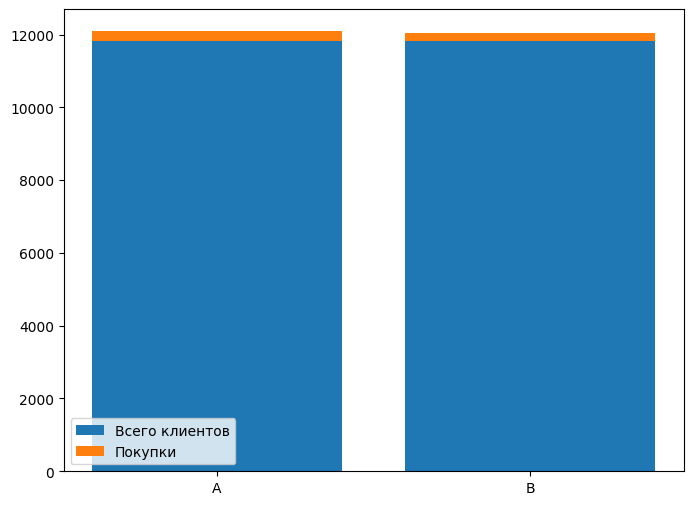

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['purchase'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['purchase'], bottom=grouped['count']['purchase'], label='Покупки')
plt.xticks([1, 2], ['A', 'B'])
plt.legend()

In [18]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=0.975 pvalue=0.323


In [19]:
from scipy.stats import shapiro

shapiro(data['revenue'])

C:\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.011638760566711426, pvalue=0.0)

C:\Users\grayni\AppData\Local\Temp\ipykernel_12464\708985249.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_revenue_A, shade=True, label='Группа А', color='g')
C:\Users\grayni\AppData\Local\Temp\ipykernel_12464\708985249.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_revenue_B, shade=True, label='Группа B', color='r')


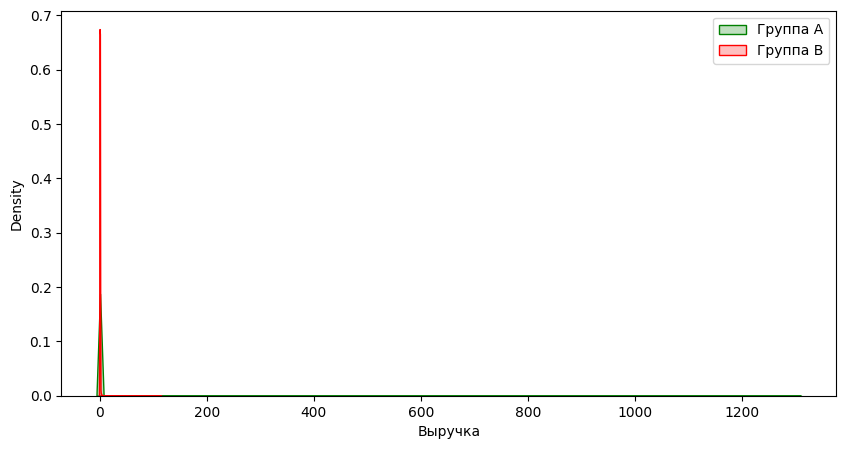

In [20]:
import seaborn as sns

data_revenue = data[['revenue', 'ab_group']]
data_revenue_A = data_revenue[data_revenue['ab_group'] == 'A']['revenue']
data_revenue_B = data_revenue[data_revenue['ab_group'] == 'B']['revenue']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_revenue_A, shade=True, label='Группа А', color='g')
sns.kdeplot(data_revenue_B, shade=True, label='Группа B', color='r')

plt.xlabel('Выручка')
plt.legend()
plt.show()

In [21]:
data.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


In [22]:
from scipy.stats import mannwhitneyu

mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['revenue'].values,
                        y=data[data['ab_group'] == 'B']['revenue'].values)

mw_stats

MannwhitneyuResult(statistic=70054756.0, pvalue=0.3243889561742552)

C:\Users\grayni\AppData\Local\Temp\ipykernel_12464\3236996011.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_num_purchases_A, shade=True, label='Группа А', color='g')
C:\Users\grayni\AppData\Local\Temp\ipykernel_12464\3236996011.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_num_purchases_B, shade=True, label='Группа B', color='r')


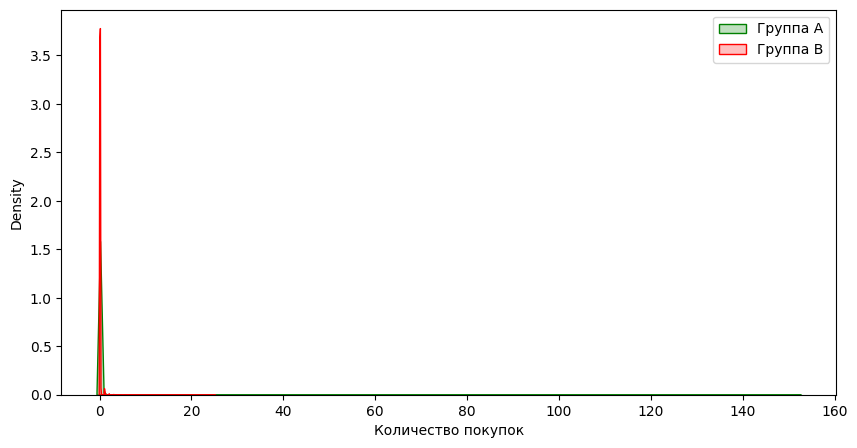

In [23]:
data_num_purchases = data[['num_purchases', 'ab_group']]
data_num_purchases_A = data_num_purchases[data_num_purchases['ab_group'] == 'A']['num_purchases']
data_num_purchases_B = data_num_purchases[data_num_purchases['ab_group'] == 'B']['num_purchases']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_num_purchases_A, shade=True, label='Группа А', color='g')
sns.kdeplot(data_num_purchases_B, shade=True, label='Группа B', color='r')

plt.xlabel('Количество покупок')
plt.legend()
plt.show()

In [24]:
from scipy.stats import shapiro

shapiro(data['num_purchases'])

C:\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.014216423034667969, pvalue=0.0)

In [25]:
mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['num_purchases'].values,
                        y=data[data['ab_group'] == 'B']['num_purchases'].values)
mw_stats

MannwhitneyuResult(statistic=70054599.0, pvalue=0.3249718497892071)

C:\Users\grayni\AppData\Local\Temp\ipykernel_12464\1203701339.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_revenue_A, shade=True, label='Группа А', color='g')
C:\Users\grayni\AppData\Local\Temp\ipykernel_12464\1203701339.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_revenue_B, shade=True, label='Группа B', color='r')


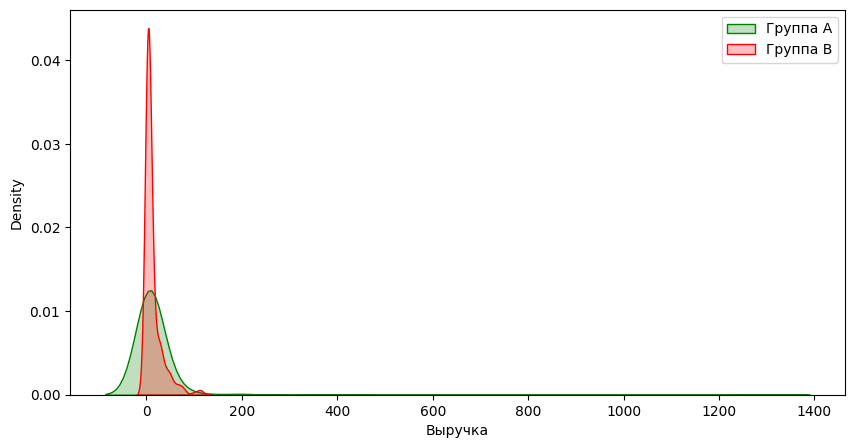

In [26]:
data_revenue = data[['revenue', 'ab_group']][data['purchase'] == 1]
data_revenue_A = data_revenue[data_revenue['ab_group'] == 'A']['revenue']
data_revenue_B = data_revenue[data_revenue['ab_group'] == 'B']['revenue']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_revenue_A, shade=True, label='Группа А', color='g')
sns.kdeplot(data_revenue_B, shade=True, label='Группа B', color='r')

plt.xlabel('Выручка')
plt.legend()
plt.show()

In [27]:
mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                        y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

In [28]:
data[data['purchase'] == 1].groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,256.0,18.698469,87.527589,0.259689,2.318301,4.28316,11.923141,1303.609284
B,234.0,12.362119,19.007065,0.259373,2.319883,3.98000,12.274829,113.830000


In [29]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix
from scipy.stats import mannwhitneyu
import itertools

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
df = pd.read_csv("data/churn_data.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [33]:
df.shape

(10000, 14)

In [34]:
df['Exited'].value_counts()[1], df['Exited'].value_counts()[0]

(2037, 7963)

In [35]:
df['Exited'].value_counts()[1]/df['Exited'].value_counts()[0]

0.25580811252040686

In [36]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Exited'],axis=1), df['Exited'], random_state=2, stratify=df['Exited'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=2)

In [37]:
y_train.value_counts()[1]/y_train.value_counts()[0]

0.2578264758497317

In [38]:
y_test.value_counts()[1]/y_test.value_counts()[0]

0.25565042692114515

In [39]:
y_val.value_counts()[1]/y_val.value_counts()[0]

0.25

In [40]:
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


class OHEEncoderBin(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        B = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        self.columns = B[:1]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)

        return X[self.columns]


class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p=2):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        B = [self.key + str(i) for i in range(1, self.p)]
        self.columns = B + ['log']
        return self

    def transform(self, X):
        Xp = X.values.reshape(-1,1)
        for i in range(2, self.p):
            Xp = np.hstack([Xp,(X.values.reshape(-1,1) ** i).astype(float)])

        Xp = np.hstack([Xp, np.log(X.values.reshape(-1,1) + 1).astype(float)])
        B = pd.DataFrame(data = Xp, index = X.index, columns =[self.columns] )
        return B[self.columns]

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5691 to 3599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        5625 non-null   int64  
 1   CustomerId       5625 non-null   int64  
 2   Surname          5625 non-null   object 
 3   CreditScore      5625 non-null   int64  
 4   Geography        5625 non-null   object 
 5   Gender           5625 non-null   object 
 6   Age              5625 non-null   int64  
 7   Tenure           5625 non-null   int64  
 8   Balance          5625 non-null   float64
 9   NumOfProducts    5625 non-null   int64  
 10  HasCrCard        5625 non-null   int64  
 11  IsActiveMember   5625 non-null   int64  
 12  EstimatedSalary  5625 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 615.2+ KB


In [42]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,5625.000000,5.625000e+03,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,4953.406400,1.569058e+07,651.079111,38.891200,5.055822,75579.223412,1.530133,0.713244,0.509689,100369.439417
std,2877.844172,7.179499e+04,95.727632,10.432907,2.890008,62564.305273,0.589311,0.452287,0.499951,57340.087384
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,2455.000000,1.562881e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51467.920000
50%,4946.000000,1.569033e+07,653.000000,37.000000,5.000000,96048.550000,1.000000,1.000000,1.000000,100791.360000
75%,7441.000000,1.575281e+07,717.000000,44.000000,8.000000,127450.140000,2.000000,1.000000,1.000000,148948.520000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199953.330000


In [43]:
X_train.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5691,5692,15601383,Ibrahimova,744,Spain,Male,44,5,120654.68,1,1,0,82290.81
7757,7758,15641585,Newton,850,France,Male,40,6,97339.99,1,0,1,88815.25
9000,9001,15723217,Cremonesi,616,France,Male,37,9,0.00,1,1,0,111312.96


In [44]:
X_train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

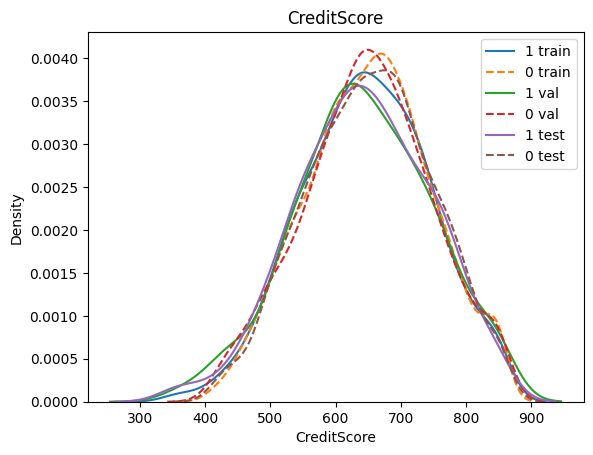

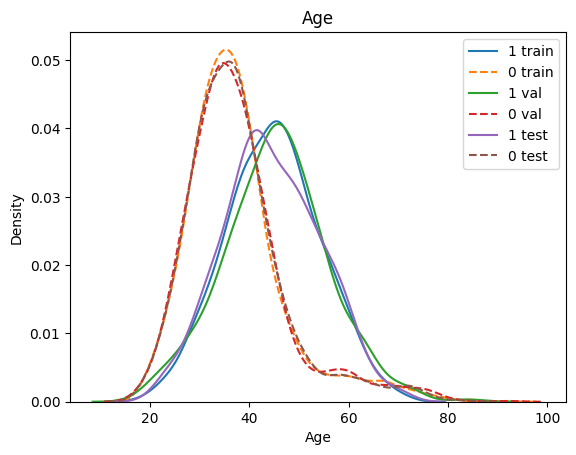

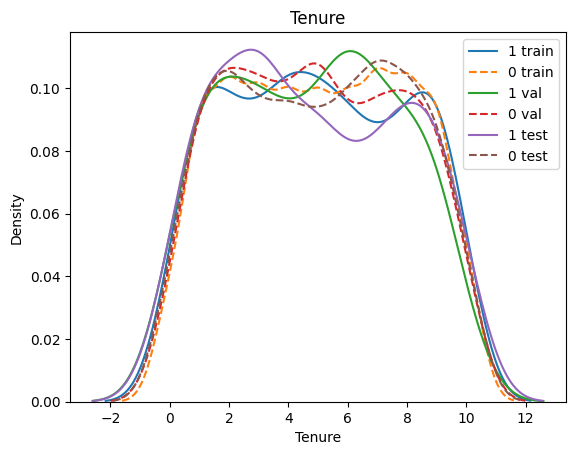

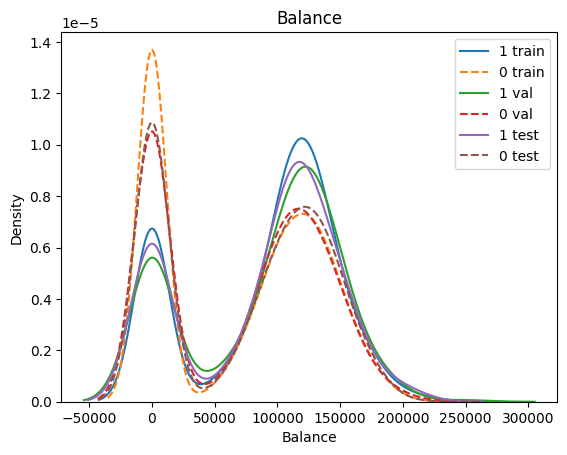

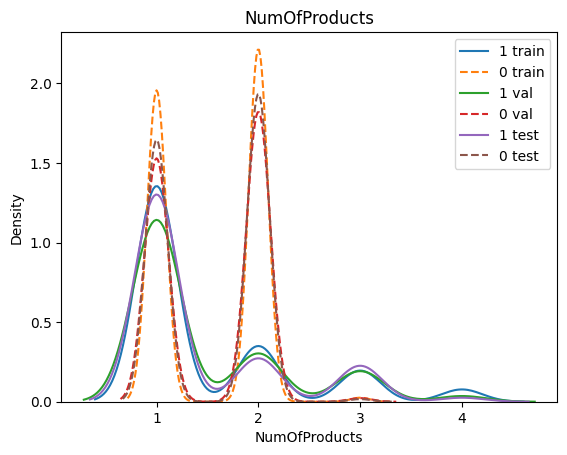

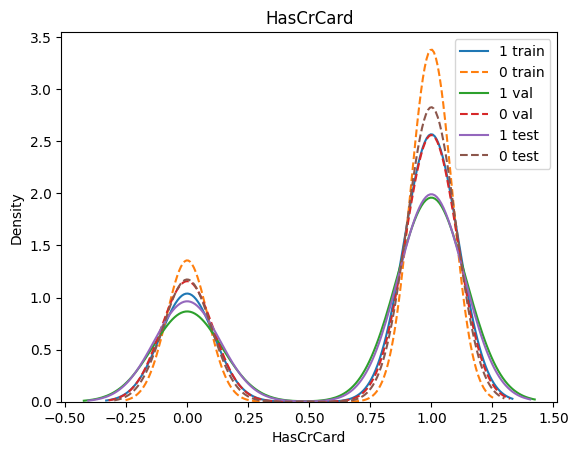

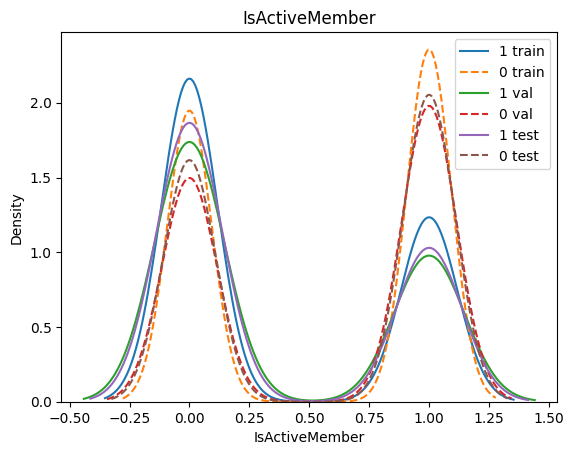

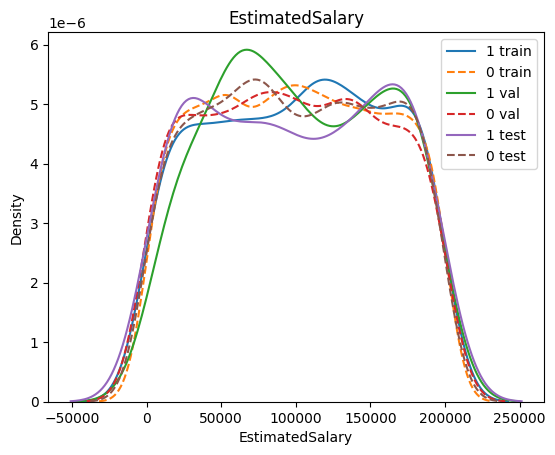

In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_train.loc[y_train == 1,i], label='1 train')
    sns.kdeplot(X_train.loc[y_train == 0,i], ls='--', label='0 train')

    sns.kdeplot(X_val.loc[y_val == 1,i], label='1 val')
    sns.kdeplot(X_val.loc[y_val == 0,i], ls='--', label='0 val')

    sns.kdeplot(X_test.loc[y_test == 1,i], label='1 test')
    sns.kdeplot(X_test.loc[y_test == 0,i], ls='--', label='0 test')
    plt.title(i)
    plt.legend()
    plt.show()

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    tr_v_stats = mannwhitneyu(X_train.loc[y_train == 1, i], X_val.loc[y_val == 1, i])
    tr_test_stats = mannwhitneyu(X_train.loc[y_train == 1, i], X_test.loc[y_test == 1, i])
    print(i, ':', tr_v_stats[1], ':', tr_test_stats[1])

CreditScore : 0.4629044239601111 : 0.4187577607040136
Age : 0.3988381309233753 : 0.49058365139821936
Tenure : 0.28067882952777423 : 0.34936843329030276
Balance : 0.9961030290330745 : 0.41825851456646534
NumOfProducts : 0.9771934293411441 : 0.266916329501643
HasCrCard : 0.488957613644045 : 0.11739012900077293
IsActiveMember : 0.9053990776493661 : 0.760337020662817
EstimatedSalary : 0.6606055498224479 : 0.7227996612291724


In [47]:
categorical_columns = ['Geography']
continuous_columns = ['CreditScore','Tenure', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_bin_columns = ['Gender',  'HasCrCard', 'IsActiveMember']


from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

gender = Pipeline([
                ('selector', FeatureSelector(column='Gender')),
                ('ohe', OHEEncoderBin(key='Gender'))
            ])

gender.fit(X_train)
gender.transform(X_test).head(3)

,Gender_Female
2308,1
5033,1
3350,0


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

geography = Pipeline([
                ('selector', FeatureSelector(column='Geography')),
                ('ohe', OHEEncoder(key='Geography'))
            ])
geography.fit(X_train)
geography.transform(X_test).head(3)

,Geography_France,Geography_Germany,Geography_Spain
2308,0,1,0
5033,1,0,0
3350,0,0,1


In [49]:
Age = Pipeline([
                ('selector', FeatureSelector(column='Age')),
                ('ohe', NumericPower(key='Age', p=3))
            ])

Age.fit(X_train)
print(Age.transform(X_test).head(3))

      Age1    Age2      Age3       log
2308  33.0  1089.0   35937.0  3.526361
5033  61.0  3721.0  226981.0  4.127134
3350  35.0  1225.0   42875.0  3.583519


In [50]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))


for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('pow_2', NumericPower(key=cont_col, p=3)),
                ('Scale', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))


for bin_col in categorical_bin_columns:
    bin_transformer = Pipeline([
                ('selector', FeatureSelector(column=bin_col)),
                ('ohe', OHEEncoderBin(key=bin_col))
            ])
    final_transformers.append((bin_col, bin_transformer))

In [51]:
final_transformers

[('Geography',
  Pipeline(steps=[('selector', FeatureSelector(column='Geography')),
                  ('ohe', OHEEncoder(key='Geography'))])),
 ('CreditScore',
  Pipeline(steps=[('selector', NumberSelector(key='CreditScore')),
                  ('pow_2', NumericPower(key='CreditScore', p=4)),
                  ('Scale', StandardScaler())])),
 ('Tenure',
  Pipeline(steps=[('selector', NumberSelector(key='Tenure')),
                  ('pow_2', NumericPower(key='Tenure', p=4)),
                  ('Scale', StandardScaler())])),
 ('Age',
  Pipeline(steps=[('selector', NumberSelector(key='Age')),
                  ('pow_2', NumericPower(key='Age', p=4)),
                  ('Scale', StandardScaler())])),
 ('Balance',
  Pipeline(steps=[('selector', NumberSelector(key='Balance')),
                  ('pow_2', NumericPower(key='Balance', p=4)),
                  ('Scale', StandardScaler())])),
 ('NumOfProducts',
  Pipeline(steps=[('selector', NumberSelector(key='NumOfProducts')),
                

In [52]:
feats = FeatureUnion(final_transformers)

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [53]:
# pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Geography',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Geography')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Geography'))])),
                                                ('CreditScore',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='CreditScore')),
                                                                 ('pow_2',
                                                                  NumericPower(key='CreditScore',
                                                                               p=4)),
                                                                 ('Scale',
                                                                  StandardScaler())])),
                                                ('Tenure',
                                                 Pipeline(s...
                                                                 ('ohe',
                                                                  OHEEncoderBin(key='Gender'))])),
                                                ('HasCrCard',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='HasCrCard')),
                                                                 ('ohe',
                                                                  OHEEncoderBin(key='HasCrCard'))])),
                                                ('IsActiveMember',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='IsActiveMember')),
                                                                 ('ohe',
                                                                  OHEEncoderBin(key='IsActiveMember'))]))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [56]:
preds = pipeline.predict_proba(X_val)[:, 1]
preds[:10]

array([0.06, 0.27, 0.17, 0.06, 0.72, 0.16, 0.21, 0.01, 0.31, 0.07])

In [55]:
precision, recall, thresholds = precision_recall_curve(y_val, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix],
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.310000, F-Score=0.595, Precision=0.541, Recall=0.661


Confusion matrix, without normalization
[[1290  210]
 [ 127  248]]


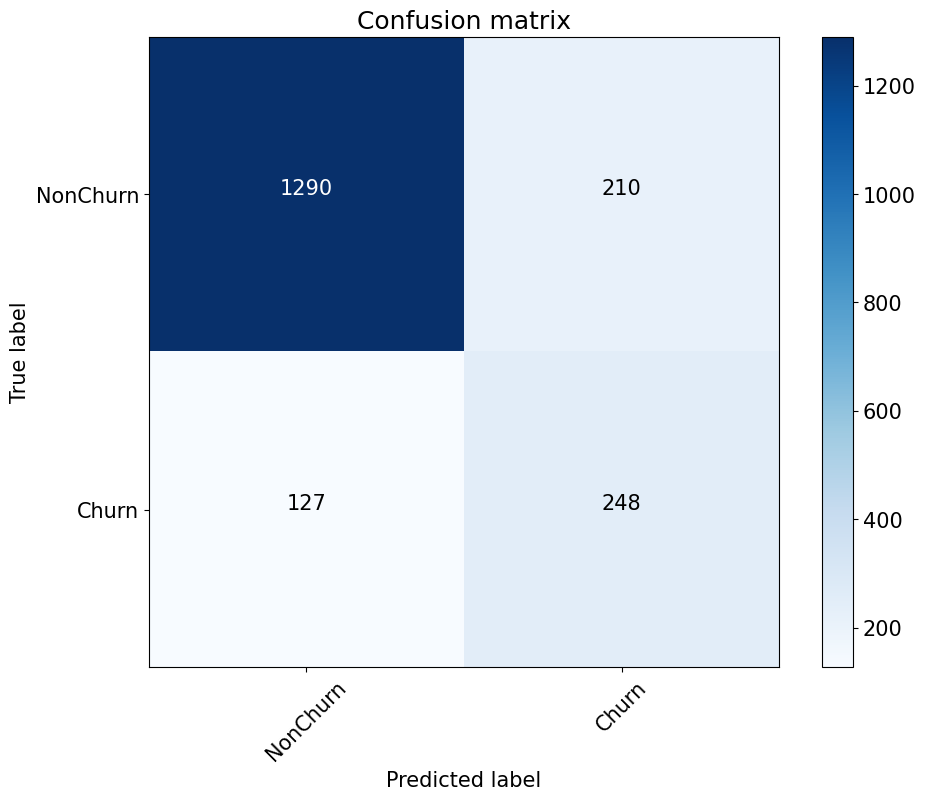

In [57]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_val, preds >= thresholds[ix])
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [58]:
# Conversion

TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

C0 = (TP + FN) / np.sum(cnf_matrix)
C0

0.2

In [59]:
X_test.shape

(2500, 13)

In [60]:
X_A, X_B, y_A, y_B = train_test_split(X_test, y_test, test_size=0.5, random_state=2, stratify=y_test)

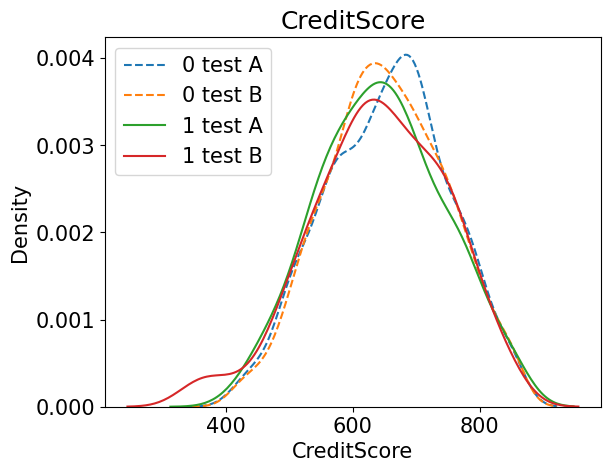

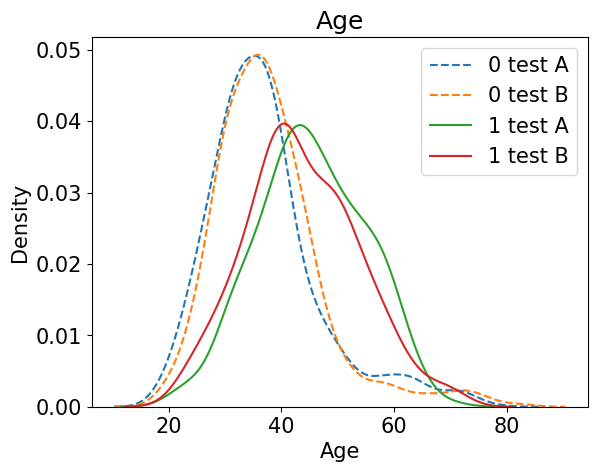

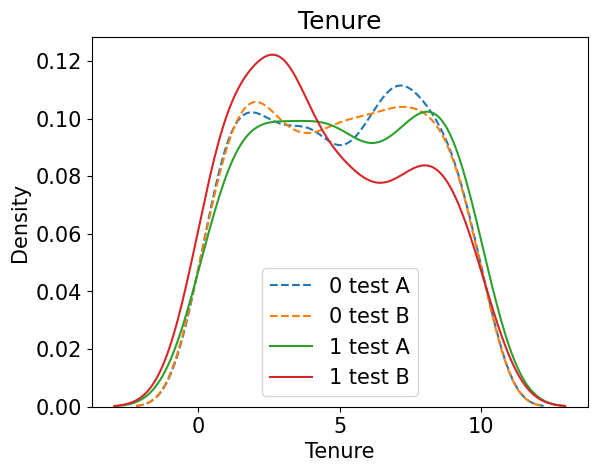

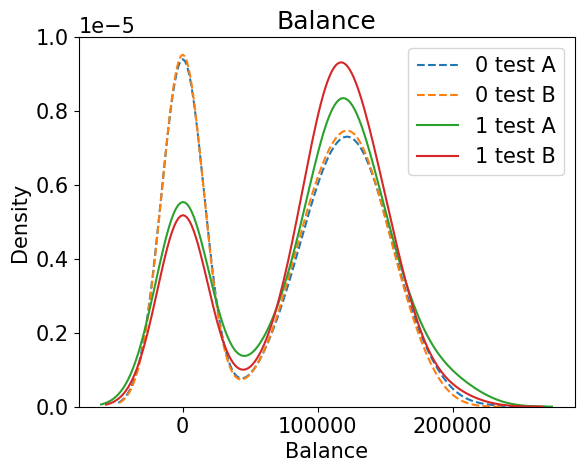

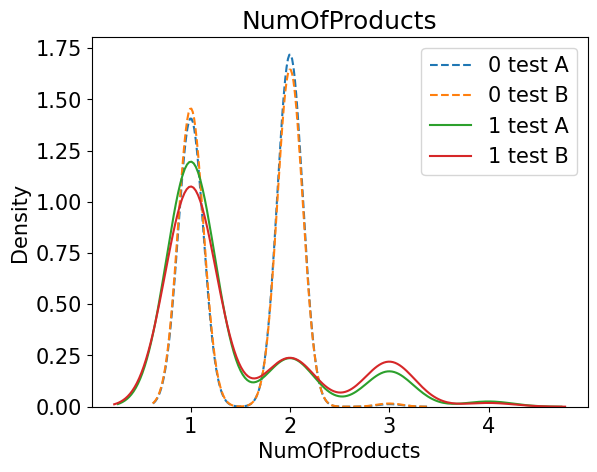

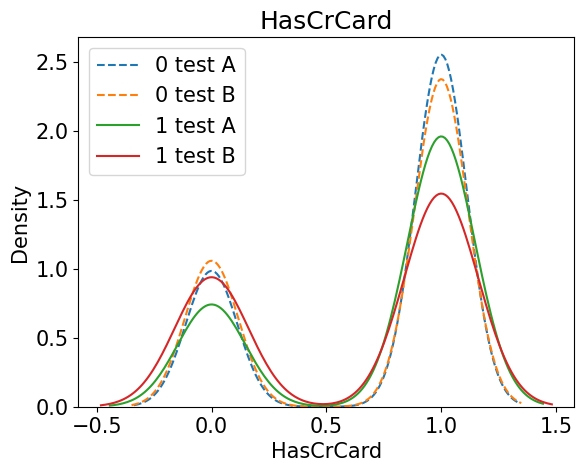

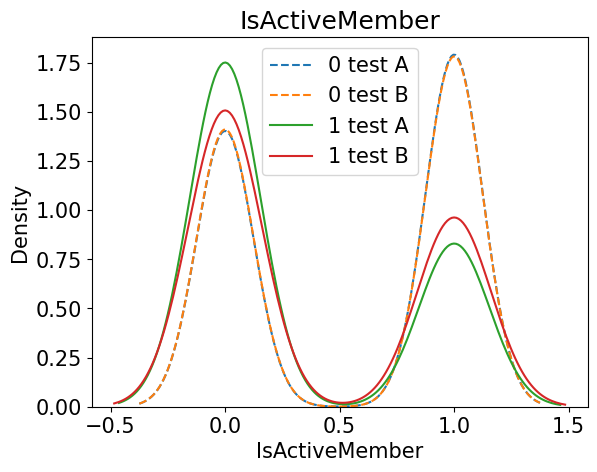

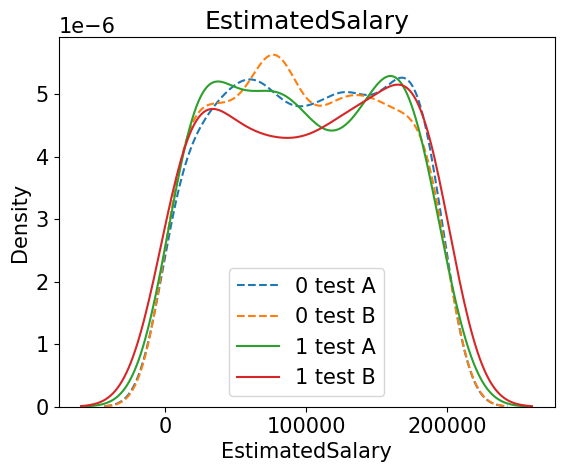

In [61]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:, 2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_A.loc[y_A == 0,i], ls='--', label='0 test A')
    sns.kdeplot(X_B.loc[y_B == 0,i], ls='--', label='0 test B')

    sns.kdeplot(X_A.loc[y_A == 1,i], label='1 test A')
    sns.kdeplot(X_B.loc[y_B == 1,i], label='1 test B')
    plt.title(i)
    plt.legend()
    plt.show()

In [62]:
predsB = pipeline.predict_proba(X_B)[:, 1]
cnf_matrix = confusion_matrix(y_B, predsB > thresholds[ix])

TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]
print(cnf_matrix)

[[853 143]
 [ 99 155]]


In [63]:
churn_ef = 0.5
C0_A = (np.sum(y_A)) / y_A.shape[0]
print(C0_A)


C1_MLB = (FN + (1-churn_ef) * TP) / np.sum(cnf_matrix)
print(C1_MLB)

0.204
0.1412


In [64]:
# Perfect group - everyone accepted the offer
y_churnA = y_A   # group A outflow

y_pred = (predsB > thresholds[ix])
ind_churn = np.where((y_pred != y_B) & (y_B == 1))
y_churnB = np.zeros(y_B.shape) # group B outflow
y_churnB[ind_churn] = 1


k1, n1 = np.sum(y_A), y_A.shape[0]
k2, n2 = np.sum(y_churnB), y_churnB.shape[0]
k1, k2, n1, n2

(255, 99.0, 1250, 1250)

In [65]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=8.949 pvalue=0.000


In [66]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=80.086 pvalue=0.000
